# Reconhecendo dígitos escritos à mão

Este exemplo mostra como o scikit-learn pode ser usado para reconhecer imagens de
dígitos escritos à mão, de 0 a 9.

In [1]:
# Import datasets, classificadores e metricas de performance
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

## Digits dataset

O Dataset de dígitos consiste em imagens de dígitos de 8x8 pixels. O atributo images do conjunto de dados armazena matrizes 8x8 de valores em escala de cinza para cada imagem. Usaremos esses arrays para visualizar as 4 primeiras imagens. O atributo target do conjunto de dados armazena o dígito que cada imagem representa e está incluído no título dos 4 gráficos abaixo.

Note: Se estamos trabalhando com imagens como (e.g., 'png' files), Nos temos que usar :func:`matplotlib.pyplot.imread` para visutalizar.

In [2]:
# Bibiloteca Standard Cientifica de Python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Carrega dados
digits = load_digits()
X = digits.images
y = digits.target

In [3]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

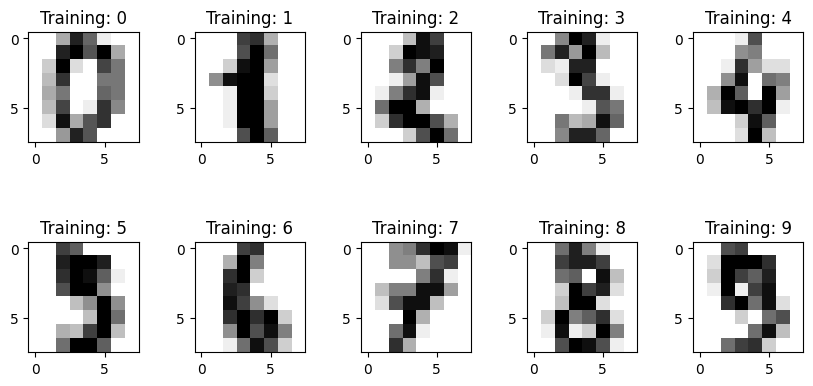

In [4]:
# Plotar os digitos parar vermos como a maquina ve.
_, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)
    plt.subplots_adjust(wspace=0.5)

In [5]:
# Import datasets, classificadores e metricas de performance pelo SVM
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

# flatten as imagens
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Creando um classificador e escolhi o SVM
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)

# Learn os digits e treinar com o SubDataset
clf.fit(X_train, y_train)

# Fazer a Predicao
predicted = clf.predict(X_test)

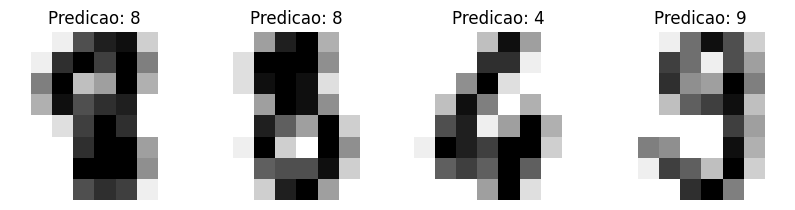

In [6]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Predicao: {prediction}")

:func:`~sklearn.metrics.classification_report` builds a text report showing
the main classification metrics.

In [7]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Também podemos traçar uma `matriz de confusão <matriz_de_confusão>` do
valores de dígitos verdadeiros e os valores de dígitos previstos.

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


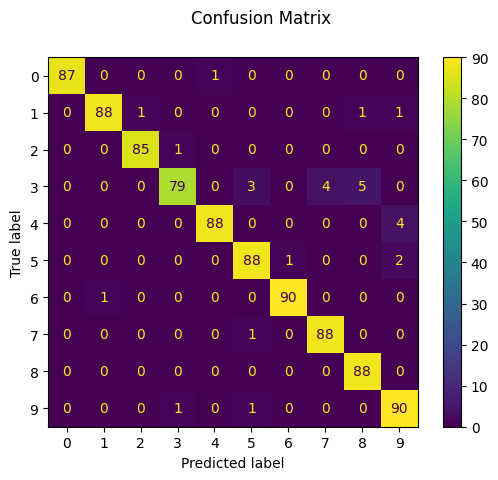

In [8]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

Se os resultados da avaliação de um classificador forem armazenados na forma de um
`matriz de confusão <confusion_matrix>` e não em termos de `y_true` e
`y_pred`, ainda é possível construir um :func:`~sklearn.metrics.classification_report`
do seguinte modo:

In [9]:
# The ground truth and predicted lists
y_true = []
y_pred = []
cm = disp.confusion_matrix

# For each cell in the confusion matrix, add the corresponding ground truths
# and predictions to the lists
for gt in range(len(cm)):
    for pred in range(len(cm)):
        y_true += [gt] * cm[gt][pred]
        y_pred += [pred] * cm[gt][pred]

print(
    "Classificaco report rebuilt from confusion matrix:\n"
    f"{metrics.classification_report(y_true, y_pred)}\n"
)

Classificaco report rebuilt from confusion matrix:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




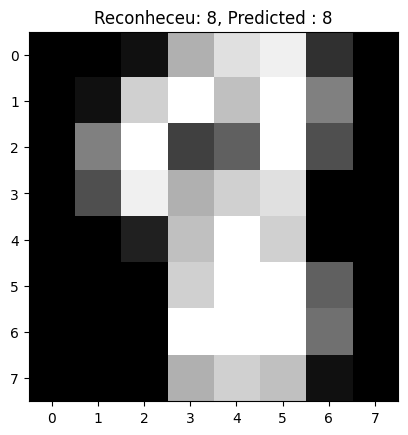

In [10]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors=3
weights='uniform'
print_wrong_pred=False

knn = KNeighborsClassifier(n_neighbors=n_neighbors)

knn.fit(X_train, y_train)

# Enviando um teste para o
qual_o_index = 0
test_image = X_test[qual_o_index]
test_image_label = y_test[qual_o_index]
test_image_pred = knn.predict(test_image.reshape(1, -1))

plt.imshow(test_image.reshape(8, 8), cmap='gray')
plt.title(f"Reconheceu: {test_image_label}, Predicted : {test_image_pred[0]}")
plt.show()

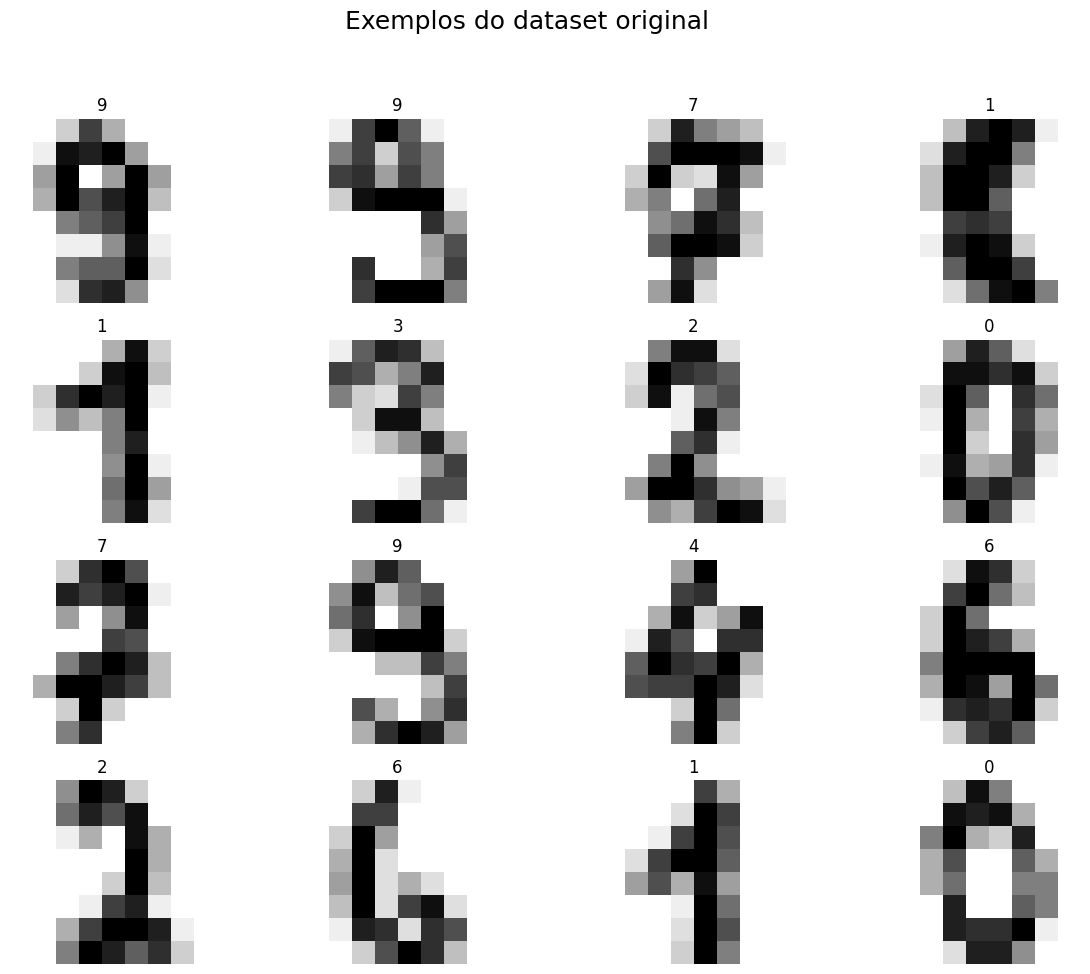

In [11]:
import random

# let's see some random data samples.
pics_count = 16
digits = np.zeros((pics_count,8,8), dtype=int)
labels = np.zeros((pics_count,1), dtype=int)
for i in range(pics_count):
  idx = random.randint(0, X.shape[0]-1)
  # se os dados estao ajustados  entao para cada X temos um Y correspondente
  digits[i] = X[idx].reshape(8,8)
  labels[i] = y[idx]

# vamos ver
fig = plt.figure()
fig.suptitle("Exemplos do dataset original", fontsize=18)
for n, (digit, label) in enumerate(zip(digits, labels)):
  a = fig.add_subplot(4, 4, n + 1)
  plt.imshow(digit, cmap=plt.cm.gray_r, interpolation="nearest")
  a.set_title(label[0])
  a.axis('off')
fig.set_size_inches(fig.get_size_inches() * pics_count / 7)
plt.show()

In [12]:
import numpy as np
from random import randint
import time

def lets_knn(X_train, y_train, X_test, y_test, n_neighbors, weights='uniform', print_wrong_pred=False):
    t0 = time.time()

    # Criando um classificador pelo modelo KNN
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
    knn.fit(X_train, y_train)
    t1 = time.time()

    # fazendo a Predicao e verificando com os labels corretos
    pred = knn.predict(X_test)
    t2 = time.time()

    # Calculando a acuracia
    accuracy = round(np.mean(pred == y_test)*100, 1)

    print("Accuracia do tipo", weights ,"com KNN: ", n_neighbors, "neighbors: ", accuracy,"%. Tempo de treino",
          round(t1 - t0, 1), "s. Tempo de Predicao ", round(t2 - t1, 1), "s")

    # Selecionando as predicoes comparadas as labels conhecidas
    wrong_pred = X_test[(pred != y_test)]
    correct_labels = y_test[(pred != y_test)]
    wrong_labels = pred[(pred != y_test)]

    if print_wrong_pred:
        # the we print first 16 of them
        fig = plt.figure()
        fig.suptitle("Predicoes Incorretas", fontsize=18)
        # para imprimir fotos de tamanhos diferentes, precisamos determinar em que formato queremos remodelar
        size = int(np.sqrt(X_train.shape[1]))

        for n, (digit, wrong_label, correct_label) in enumerate(zip(wrong_pred, wrong_labels, correct_labels)):
            a = fig.add_subplot(4, 4, n + 1)
            plt.imshow(digit.reshape(size,size),cmap=plt.cm.gray_r)
            a.set_title("Correto: " + str(correct_label) + ". Predicted: " + str(wrong_label))
            a.axis('off')
            if n == 15:
                break
        fig.set_size_inches(fig.get_size_inches() * pics_count / 7)
        plt.show()

Accuracia do tipo uniform com KNN:  50 neighbors:  90.8 %. Tempo de treino 0.0 s. Tempo de Predicao  0.0 s


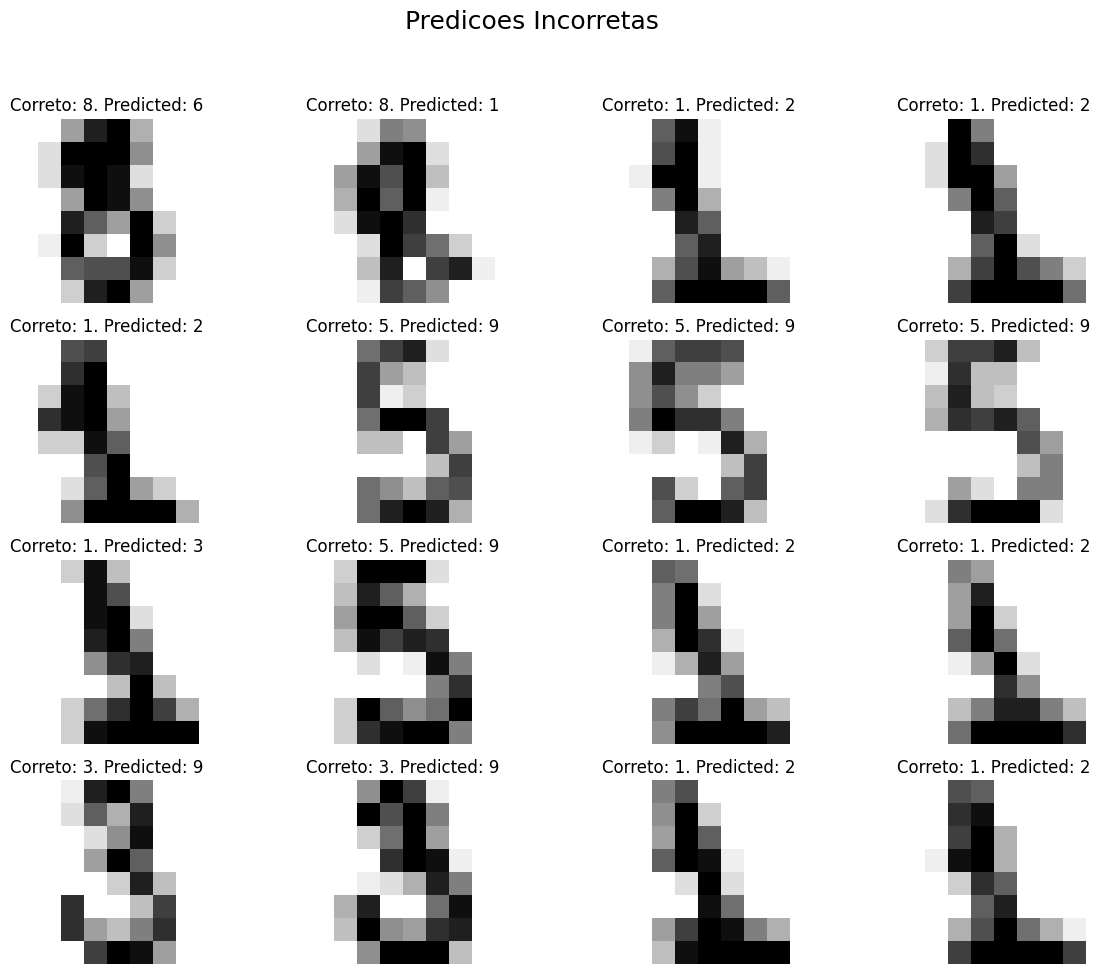

In [13]:
lets_knn(X_train, y_train, X_test, y_test, 50, 'uniform', print_wrong_pred=True)